# Verifying boundary conditions numerically

For the case of a crack with concentrated splitting forces, we consider the Westergaard function:
$$ Z_I = \frac{P}{\pi(z-b)}\frac{\sqrt{a^2-b^2}}{\sqrt{z^2-a^2}} $$

The derivative can be calculated
$$ Z_I^\prime = -\frac{P\sqrt{a^2-b^2}}{\pi(z-b)^2(z^2-a^2)^{3/2}}(2z^2-zb-a^2) $$

The stresses for a mode I problem are
$$ \sigma_x = \text{Re}\{Z_I\} - y \text{Im}\{Z_I^\prime\} $$
$$ \sigma_y = \text{Re}\{Z_I\} + y \text{Im}\{Z_I^\prime\} $$
$$ \sigma_{xy} = - y \text{Re}\{Z_I^\prime\} $$

It is apparent that the remote boundary conditions are satisfied as both $Z_I$ and $Z_I^\prime$ approach 0 as $z \to \infty$, but near the crack tip we still need to satisfy the conditions:
$$ \sigma_y = 0 \qquad |x| < a, y = 0, x \ne b $$
$$ \sigma_{xy} = 0 \qquad |x| < a, y = 0$$
$$ \int_{-a}^a \sigma_y dx = -P \qquad |x| < a, y = 0 $$

Here we will do this numerically, using arbitrary values for $a$ and $b$.

<IPython.core.display.Javascript object>


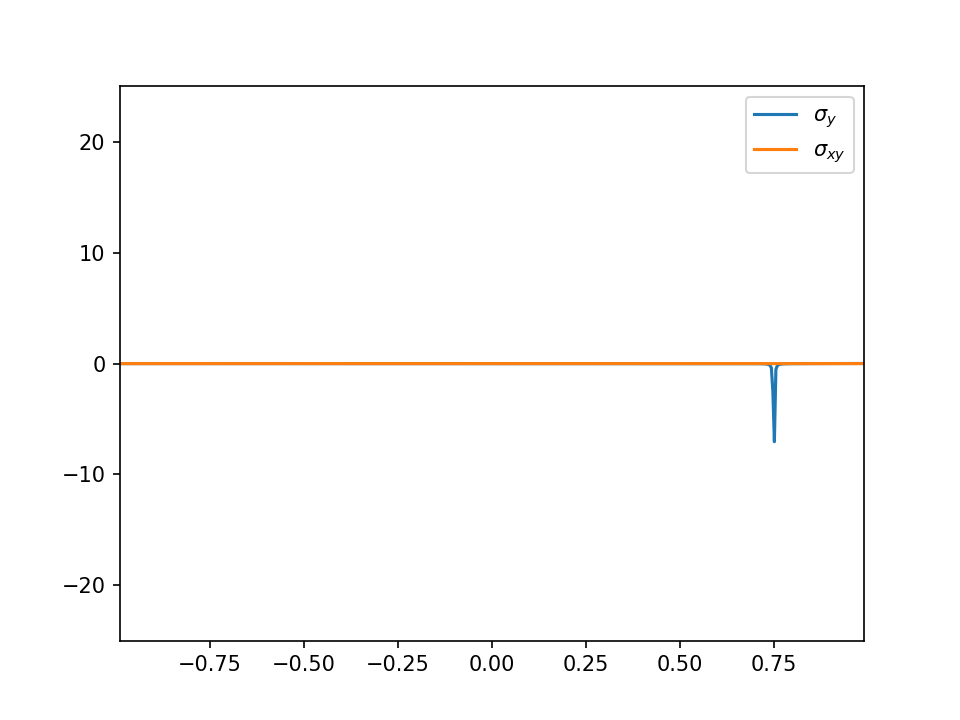

In [35]:
import numpy as np

#geometric parameters
a = 1.0
b = 0.75
P = 25.0
#very small distance (to account for some numerical issues with limits)
eps = 1e-6
#this library uses "j" as the imaginary number
zaa = np.linspace(-a,a,500) + 1j*eps

def ZI(z):
    return P/(np.pi*(z-b))*(np.sqrt(a**2-b**2))/(np.sqrt(z**2-a**2))

def ZIp(z):
    return -P*np.sqrt(a**2-b**2)/np.pi/(z-b)**2/(z**2-a**2)**(3/2)*(2*z**2-z*b-a**2)

# plot the stresses
%matplotlib notebook
import matplotlib.pyplot as plt
rzi = ZI(zaa).real
izip = ZIp(zaa).imag
rzip = ZIp(zaa).real
sy = rzi - zaa.imag*izip
sxy = -zaa.imag*rzip
plt.plot(zaa.real,sy, label=r'$\sigma_y$')
plt.plot(zaa.real,sxy, label=r'$\sigma_{xy}$')
plt.xlim([-.99*a,.99*a])
plt.ylim([-P,P])
plt.legend()

We can see that the shear stress is, in fact, zero, while the y-stress is zero everywhere except right at b. We will now find the magnitude via numerical integration. To do so, we will neglect the area outside of the region $|z| < b+\epsilon$ (as we can clearly see that is zero).

In [46]:
#very small distance (to account for some numerical issues with limits and complex numbers)
eps = a*1e-3
#this library uses "j" as the imaginary number
zbe = np.linspace(b-eps,b+eps,100000) + 1j*eps*1e-3

rzib = ZI(zbe).real
izipb = ZIp(zbe).imag
sy = rzib - zbe.imag*izipb

P + np.trapz(sy,x=zbe.real)

0.03183114409640453

We see that the difference between the applied load and the integral is approximately zero for $\sigma_y$.